In [4]:
from dask.distributed import Client

client = Client(n_workers=4)

In [5]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [6]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 436 ms, sys: 133 ms, total: 568 ms
Wall time: 3 s


In [7]:
from dask import delayed

In [8]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 766 µs, sys: 207 µs, total: 973 µs
Wall time: 733 µs


In [9]:
%%time
# This actually runs our computation using a local process pool

z.compute()

CPU times: user 333 ms, sys: 85 ms, total: 418 ms
Wall time: 2.04 s


5

In [10]:
z

Delayed('add-197e820c-5b37-4da4-827c-0931d6f717ea')

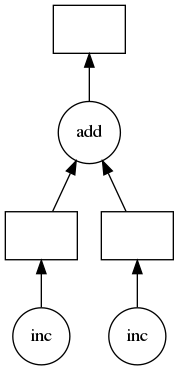

In [13]:
# Look at the task graph for `z`
z.visualize()